<a href="https://colab.research.google.com/github/waltgarcia/python4health/blob/main/Obesity_and_inflammation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset source:
[ Obesity, inflammatory factors, and breast cancer](https://www.scidb.cn/en/detail?dataSetId=750f6fc704b4441297197a942760ac77&version=V1)

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#dataset
df = pd.read_excel('/content/data collection.xlsx', engine='openpyxl')

In [6]:
df.head()

,住院号,姓名,年龄,绝经,身高,体重,糖尿病史,糖尿病用药,空腹血糖,TK1,...,分型,分型数字,AR,淋巴结,腋窝,前哨,组织学分级,脉管,良恶性,直径
0,*,*,57,0,160.0,56.0,1,0,6.96,NaN,...,三阴,3.0,NaN,13/13,LV3,NaN,（左乳）髓样特征的浸润性癌。,0.0,1,0.5
1,*,*,73,1,155.0,50.0,0,0,4.27,NaN,...,Her2阳性（HR阳性）,4.0,NaN,NaN,7/25,NaN,（右乳）浸润性导管癌，III级，累及乳头皮肤，,0.0,1,10.0
2,*,*,39,0,165.0,60.0,0,0,3.88,NaN,...,三阴,3.0,NaN,NaN,5/18,NaN,（左乳）浸润性癌，考虑浸润性导管癌III级，伴大量淋巴细胞浸润。,0.0,1,2.0
3,*,*,53,1,160.0,62.0,1,达美康,18.05,NaN,...,A,1.0,NaN,NaN,4/16,NaN,（右乳）浸润性癌导管，III级，脉管内见癌栓，,1.0,1,2.0
4,*,*,79,1,155.0,60.0,1,0,7.10,NaN,...,三阴,3.0,NaN,22/23,3/3,NaN,（右乳）浸润性小叶癌（多形性亚型），脉管内见癌栓,1.0,1,6.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   住院号       741 non-null    object 
 1   姓名        741 non-null    object 
 2   年龄        741 non-null    int64  
 3   绝经        741 non-null    int64  
 4   身高        741 non-null    float64
 5   体重        741 non-null    float64
 6   糖尿病史      741 non-null    int64  
 7   糖尿病用药     720 non-null    object 
 8   空腹血糖      740 non-null    float64
 9   TK1       2 non-null      object 
 10  VEGF      679 non-null    float64
 11  CA125     566 non-null    float64
 12  CA153     566 non-null    float64
 13  CEA       592 non-null    float64
 14  肿特        541 non-null    float64
 15  FIB       735 non-null    float64
 16  DD        10 non-null     float64
 17  WBC       741 non-null    float64
 18  N         741 non-null    float64
 19  L         741 non-null    float64
 20  PLT       741 non-null    float6

In [9]:
#update column names
# Create a dictionary mapping Chinese column names to English translations
column_name_mapping = {
    '住院号': 'Hospitalization_ID',
    '姓名': 'Name',
    '年龄': 'Age',
    '绝经': 'Menopausal_Status',
    '身高': 'Height',
    '体重': 'Weight',
    '糖尿病史': 'Diabetes_History',
    '糖尿病用药': 'Diabetes_Medication',
    '空腹血糖': 'Fasting_Blood_Glucose',
    'TK1': 'Thymidine_Kinase_1',
    'VEGF': 'Vascular_Endothelial_Growth_Factor',
    'CA125': 'Cancer_Antigen_125',
    'CA153': 'Cancer_Antigen_15_3',
    'CEA': 'Carcinoembryonic_Antigen',
    '肿特': 'Tumor_Specificity',
    'FIB': 'Fibrinogen',
    'DD': 'D_Dimer',
    'WBC': 'White_Blood_Cell_Count',
    'N': 'Neutrophils',
    'L': 'Lymphocytes',
    'PLT': 'Platelets',
    'HB': 'Hemoglobin',
    'HSCRP': 'High_Sensitivity_CRP',
    'TC': 'Total_Cholesterol',
    'TG': 'Triglycerides',
    'LDLC': 'LDL_Cholesterol',
    'HDLC': 'HDL_Cholesterol',
    'UA': 'Uric_Acid',
    '病理号': 'Pathology_ID',
    '手术日期': 'Surgery_Date',
    'ER': 'Estrogen_Receptor',
    'ER阴阳性': 'ER_Positive_Negative',
    'PR': 'Progesterone_Receptor',
    'PR阴阳性': 'PR_Positive_Negative',
    'HER': 'HER2_Status',
    'her2': 'HER2_Score',
    'HER平均拷贝数': 'HER2_Average_Copy_Number',
    '血HER2': 'Serum_HER2',
    'Ki': 'Ki67_Index',
    '分型': 'Molecular_Subtype',
    '分型数字': 'Subtype_Numeric',
    'AR': 'Androgen_Receptor',
    '淋巴结': 'Lymph_Node_Status',
    '腋窝': 'Axillary_Lymph_Nodes',
    '前哨': 'Sentinel_Lymph_Node',
    '组织学分级': 'Histological_Grade',
    '脉管': 'Lymphovascular_Invasion',
    '良恶性': 'Benign_Malignant',
    '直径': 'Tumor_Diameter'
}

# Rename the columns
df = df.rename(columns=column_name_mapping)

# Verify the changes
print(df.columns.tolist())

['Hospitalization_ID', 'Name', 'Age', 'Menopausal_Status', 'Height', 'Weight', 'Diabetes_History', 'Diabetes_Medication', 'Fasting_Blood_Glucose', 'Thymidine_Kinase_1', 'Vascular_Endothelial_Growth_Factor', 'Cancer_Antigen_125', 'Cancer_Antigen_15_3', 'Carcinoembryonic_Antigen', 'Tumor_Specificity', 'Fibrinogen', 'D_Dimer', 'White_Blood_Cell_Count', 'Neutrophils', 'Lymphocytes', 'Platelets', 'Hemoglobin', 'High_Sensitivity_CRP', 'Total_Cholesterol', 'Triglycerides', 'LDL_Cholesterol', 'HDL_Cholesterol', 'Uric_Acid', 'Pathology_ID', 'Surgery_Date', 'Estrogen_Receptor', 'ER_Positive_Negative', 'Progesterone_Receptor', 'PR_Positive_Negative', 'HER2_Status', 'HER2_Score', 'HER2_Average_Copy_Number', 'Serum_HER2', 'Ki67_Index', 'Molecular_Subtype', 'Subtype_Numeric', 'Androgen_Receptor', 'Lymph_Node_Status', 'Axillary_Lymph_Nodes', 'Sentinel_Lymph_Node', 'Histological_Grade', 'Lymphovascular_Invasion', 'Benign_Malignant', 'Tumor_Diameter']


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hospitalization_ID                  741 non-null    object 
 1   Name                                741 non-null    object 
 2   Age                                 741 non-null    int64  
 3   Menopausal_Status                   741 non-null    int64  
 4   Height                              741 non-null    float64
 5   Weight                              741 non-null    float64
 6   Diabetes_History                    741 non-null    int64  
 7   Diabetes_Medication                 720 non-null    object 
 8   Fasting_Blood_Glucose               740 non-null    float64
 9   Thymidine_Kinase_1                  2 non-null      object 
 10  Vascular_Endothelial_Growth_Factor  679 non-null    float64
 11  Cancer_Antigen_125                  566 non-n

In [11]:
df.head()

,Hospitalization_ID,Name,Age,Menopausal_Status,Height,Weight,Diabetes_History,Diabetes_Medication,Fasting_Blood_Glucose,Thymidine_Kinase_1,...,Molecular_Subtype,Subtype_Numeric,Androgen_Receptor,Lymph_Node_Status,Axillary_Lymph_Nodes,Sentinel_Lymph_Node,Histological_Grade,Lymphovascular_Invasion,Benign_Malignant,Tumor_Diameter
0,*,*,57,0,160.0,56.0,1,0,6.96,NaN,...,三阴,3.0,NaN,13/13,LV3,NaN,（左乳）髓样特征的浸润性癌。,0.0,1,0.5
1,*,*,73,1,155.0,50.0,0,0,4.27,NaN,...,Her2阳性（HR阳性）,4.0,NaN,NaN,7/25,NaN,（右乳）浸润性导管癌，III级，累及乳头皮肤，,0.0,1,10.0
2,*,*,39,0,165.0,60.0,0,0,3.88,NaN,...,三阴,3.0,NaN,NaN,5/18,NaN,（左乳）浸润性癌，考虑浸润性导管癌III级，伴大量淋巴细胞浸润。,0.0,1,2.0
3,*,*,53,1,160.0,62.0,1,达美康,18.05,NaN,...,A,1.0,NaN,NaN,4/16,NaN,（右乳）浸润性癌导管，III级，脉管内见癌栓，,1.0,1,2.0
4,*,*,79,1,155.0,60.0,1,0,7.10,NaN,...,三阴,3.0,NaN,22/23,3/3,NaN,（右乳）浸润性小叶癌（多形性亚型），脉管内见癌栓,1.0,1,6.0


In [19]:
missing_stats = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Percentage (%)': (df.isnull().mean() * 100).round(2)
})
print(missing_stats.sort_values('Missing Count', ascending=False))

                                    Missing Count  Percentage (%)
Thymidine_Kinase_1                            739           99.73
D_Dimer                                       731           98.65
Androgen_Receptor                             725           97.84
HER2_Average_Copy_Number                      702           94.74
Axillary_Lymph_Nodes                          699           94.33
Serum_HER2                                    629           84.89
Sentinel_Lymph_Node                           597           80.57
Lymph_Node_Status                             489           65.99
HER2_Score                                    435           58.70
HER2_Status                                   433           58.43
Molecular_Subtype                             383           51.69
Ki67_Index                                    383           51.69
PR_Positive_Negative                          383           51.69
Lymphovascular_Invasion                       383           51.69
ER_Positiv

In [20]:
#drop columns with more than 20% of missing values}
# Calculate missing value percentages
missing_percent = df.isnull().mean() * 100

# Identify columns to drop (threshold: >20% missing)
cols_to_drop = missing_percent[missing_percent > 20].index.tolist()

# Drop these columns from the DataFrame
df_clean = df.drop(columns=cols_to_drop)

# Verification
print(f"Dropped {len(cols_to_drop)} columns: {cols_to_drop}")
print(f"New shape: {df_clean.shape}")
print("\nMissing values in remaining columns:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

Dropped 23 columns: ['Thymidine_Kinase_1', 'Cancer_Antigen_125', 'Cancer_Antigen_15_3', 'Carcinoembryonic_Antigen', 'Tumor_Specificity', 'D_Dimer', 'Estrogen_Receptor', 'ER_Positive_Negative', 'Progesterone_Receptor', 'PR_Positive_Negative', 'HER2_Status', 'HER2_Score', 'HER2_Average_Copy_Number', 'Serum_HER2', 'Ki67_Index', 'Molecular_Subtype', 'Subtype_Numeric', 'Androgen_Receptor', 'Lymph_Node_Status', 'Axillary_Lymph_Nodes', 'Sentinel_Lymph_Node', 'Lymphovascular_Invasion', 'Tumor_Diameter']
New shape: (741, 26)

Missing values in remaining columns:
Diabetes_Medication                   21
Fasting_Blood_Glucose                  1
Vascular_Endothelial_Growth_Factor    62
Fibrinogen                             6
Uric_Acid                              1
dtype: int64


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hospitalization_ID                  741 non-null    object 
 1   Name                                741 non-null    object 
 2   Age                                 741 non-null    int64  
 3   Menopausal_Status                   741 non-null    int64  
 4   Height                              741 non-null    float64
 5   Weight                              741 non-null    float64
 6   Diabetes_History                    741 non-null    int64  
 7   Diabetes_Medication                 720 non-null    object 
 8   Fasting_Blood_Glucose               740 non-null    float64
 9   Thymidine_Kinase_1                  2 non-null      object 
 10  Vascular_Endothelial_Growth_Factor  679 non-null    float64
 11  Cancer_Antigen_125                  566 non-n

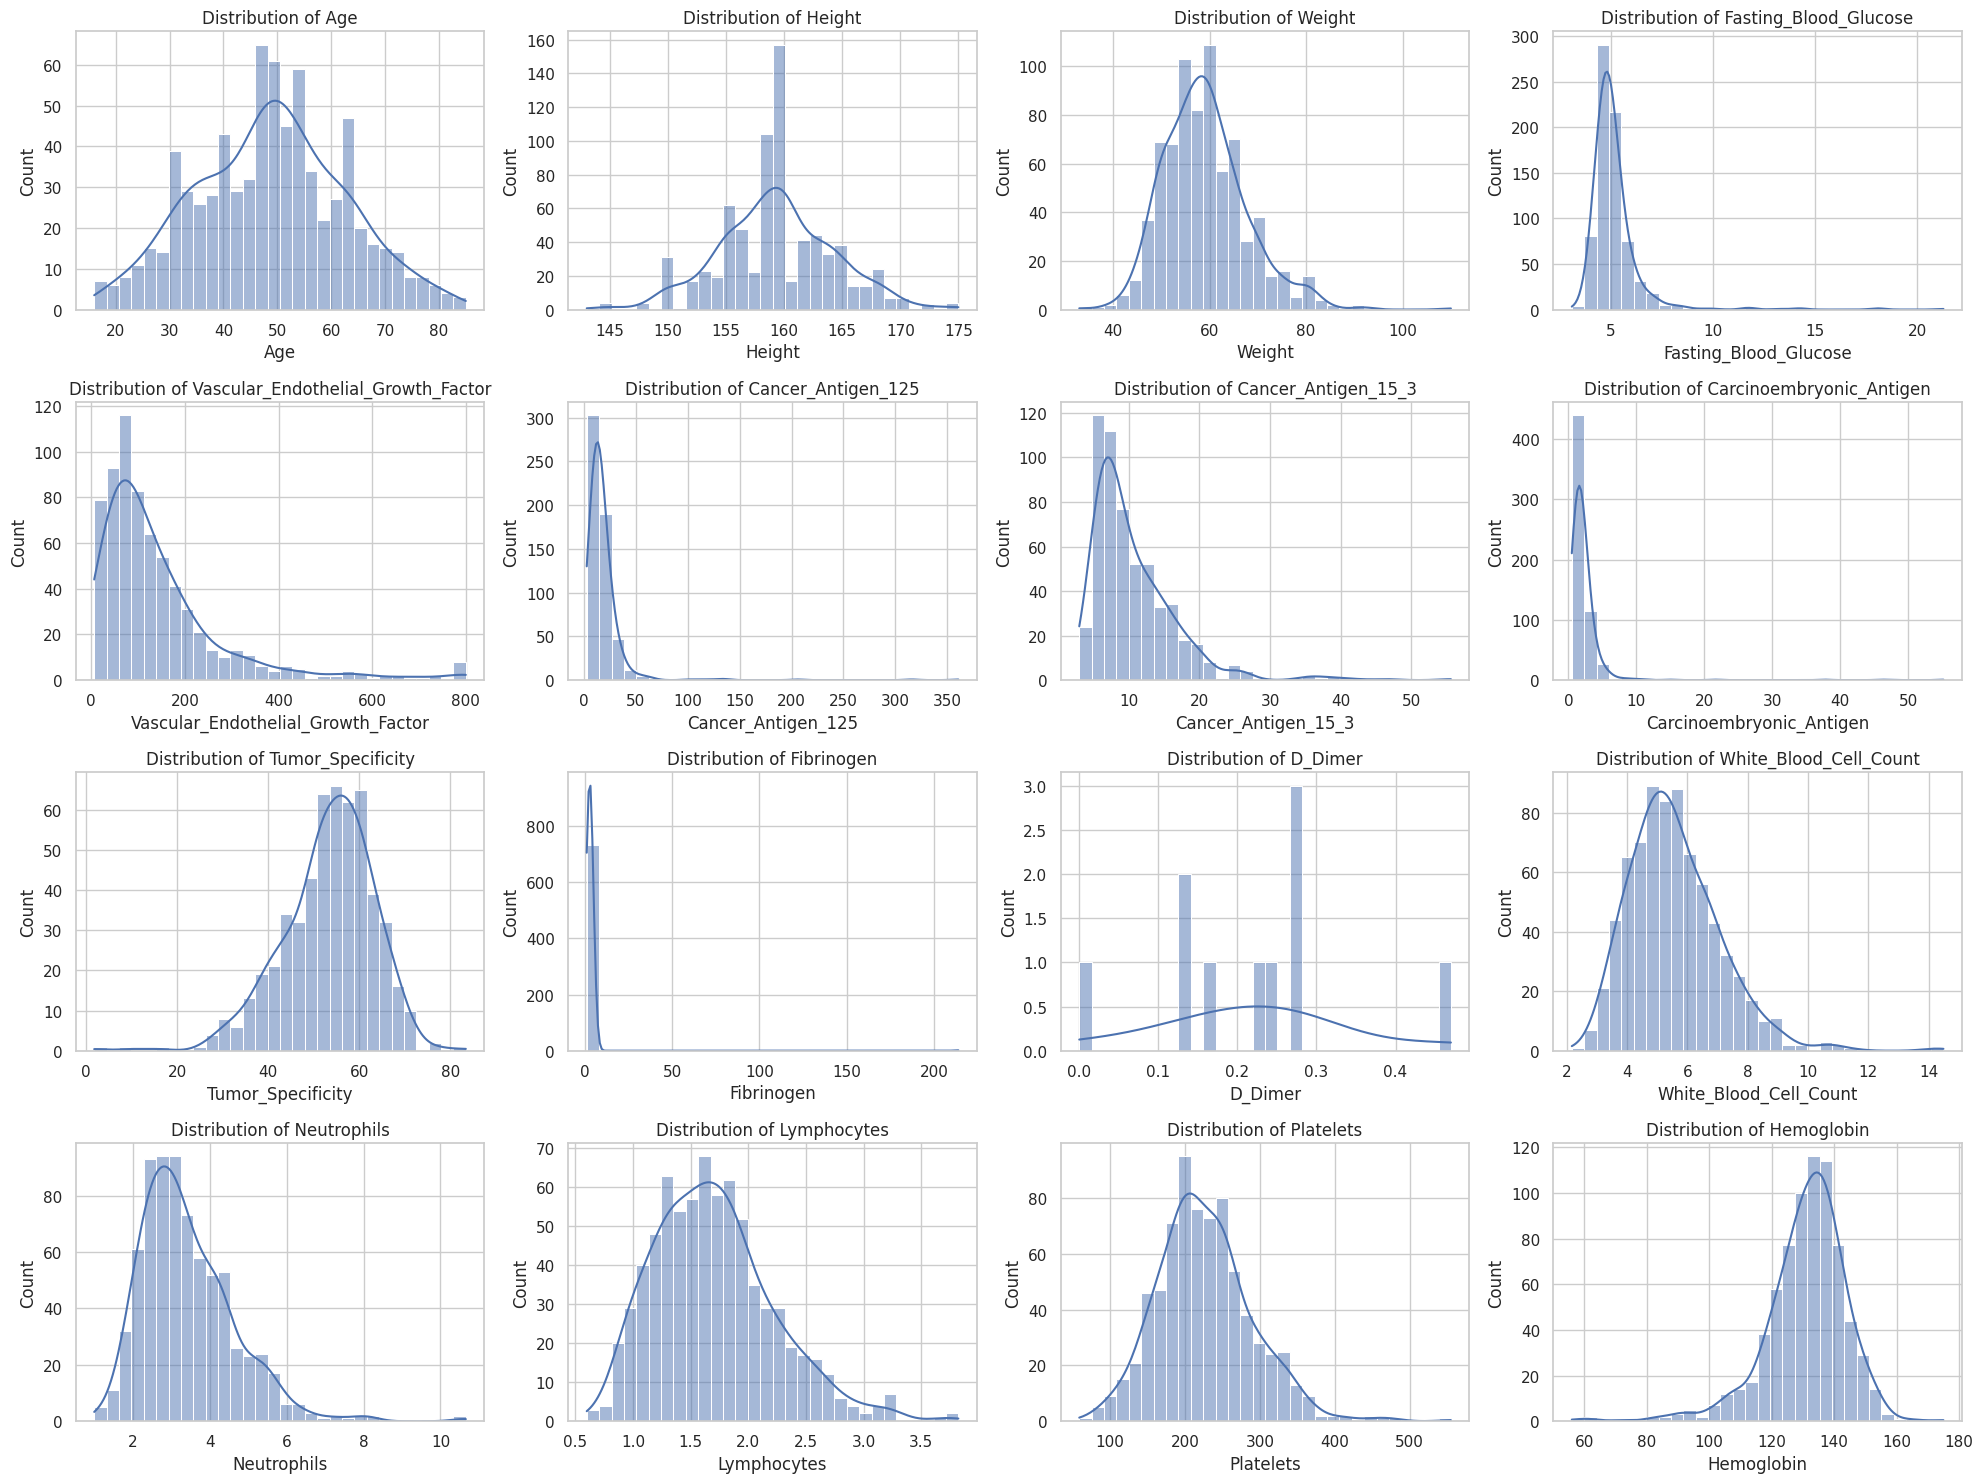

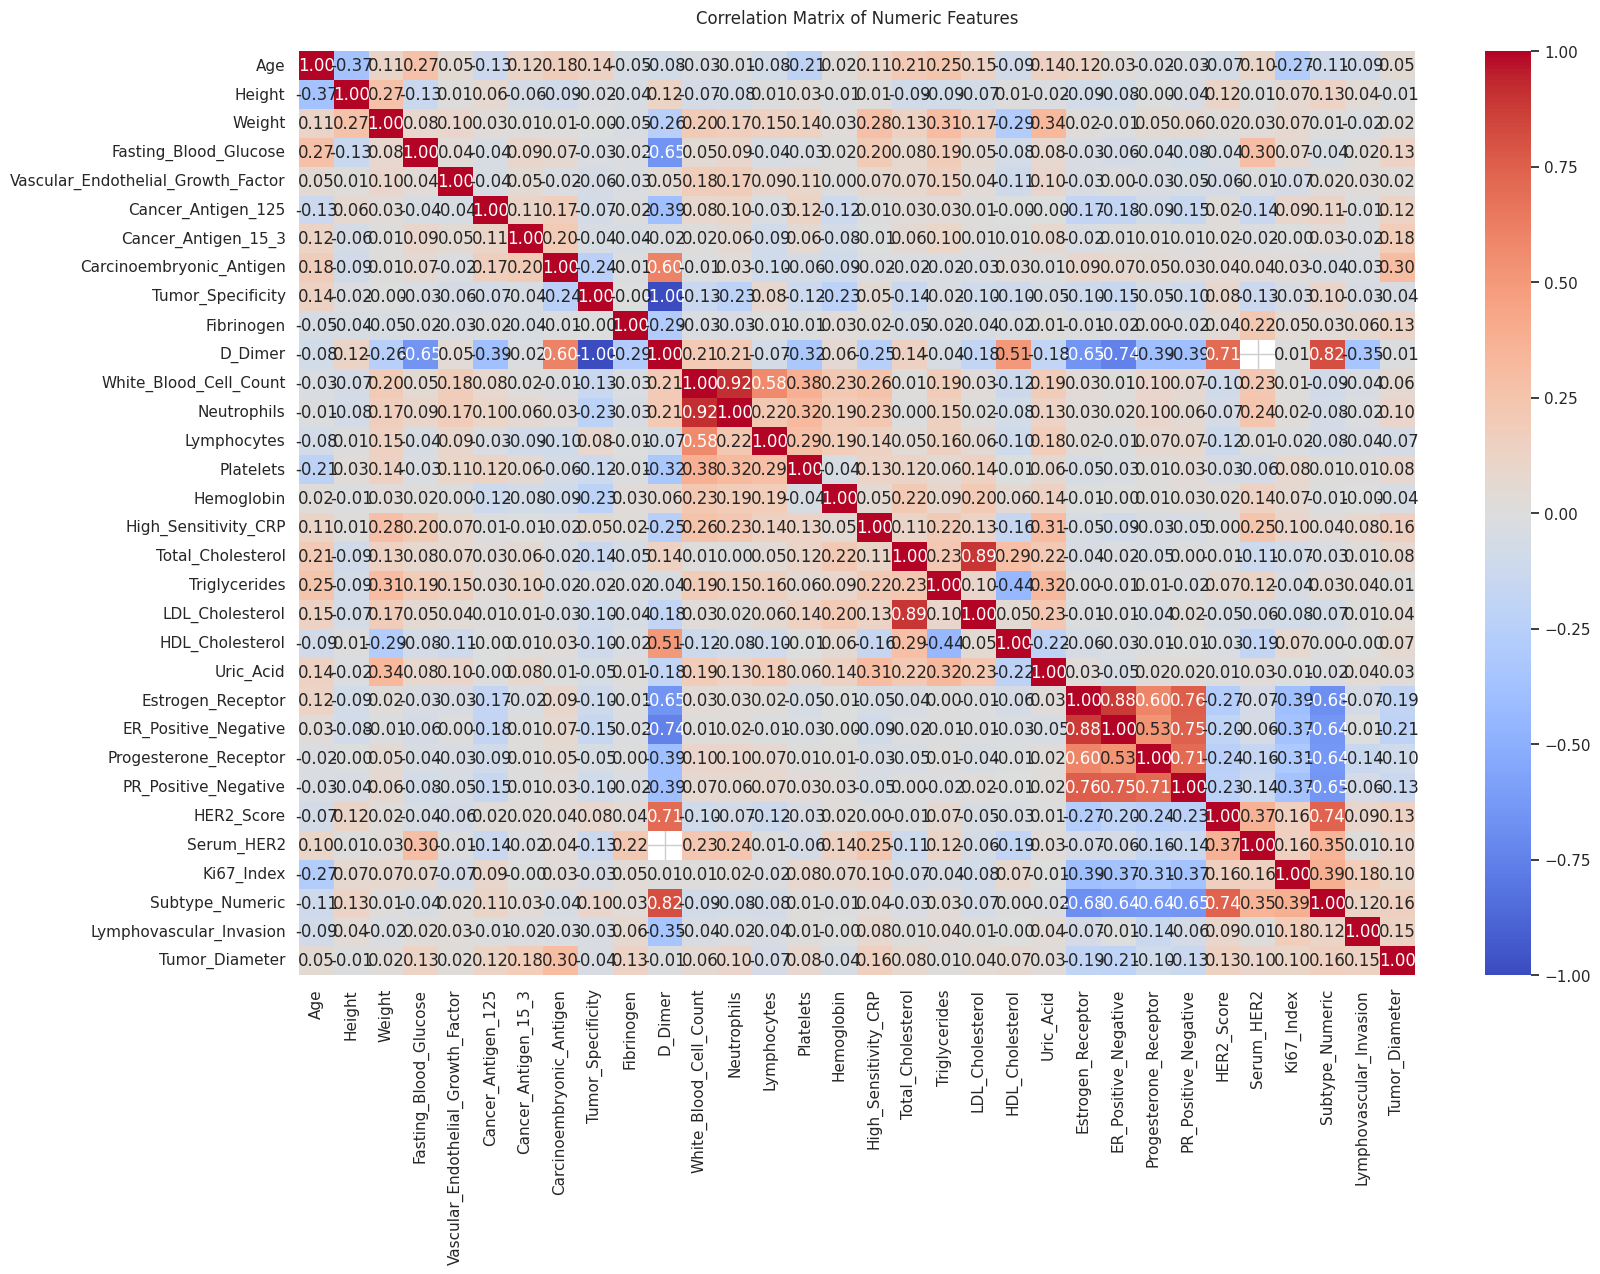

In [27]:
# Select numeric columns (excluding binary/categorical)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['Menopausal_Status', 'Diabetes_History', 'Benign_Malignant']]

# 2.1 Distribution Plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_cols[:16]):  # First 16 for visibility
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# 2.2 Correlation Heatmap
plt.figure(figsize=(18, 12))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Numeric Features", pad=20)
plt.show()

<ipython-input-28-f2291375fd0a>:12: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-f2291375fd0a>:12: UserWarning: Glyph 38452 (\N{CJK UNIFIED IDEOGRAPH-9634}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-f2291375fd0a>:12: UserWarning: Glyph 38451 (\N{CJK UNIFIED IDEOGRAPH-9633}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-f2291375fd0a>:12: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-f2291375fd0a>:12: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-28-f2291375fd0a>:12: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19977 (\N{CJK 

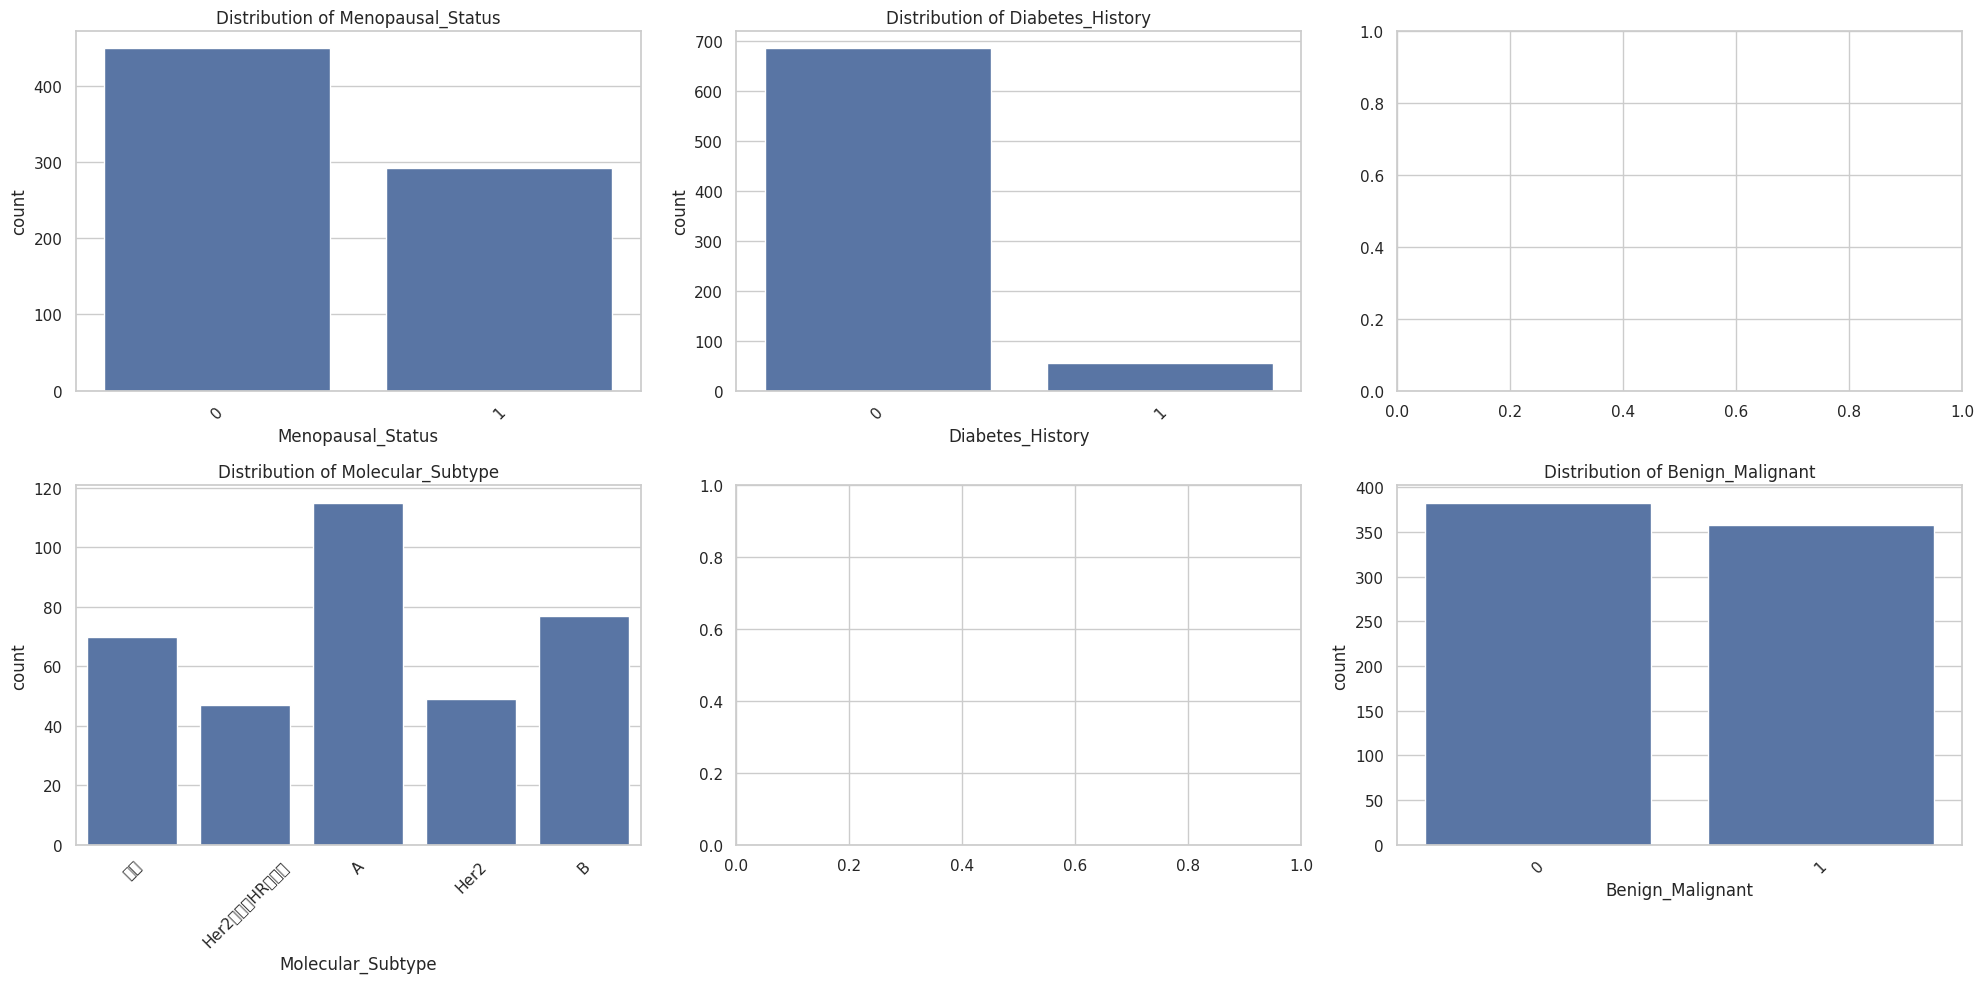

In [28]:
# 3.1 Categorical Count Plots
cat_cols = ['Menopausal_Status', 'Diabetes_History', 'HER2_Status', 'Molecular_Subtype', 'Histological_Grade', 'Benign_Malignant']

plt.figure(figsize=(20, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i+1)
    if df[col].nunique() > 10:  # Skip high-cardinality columns
        continue
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

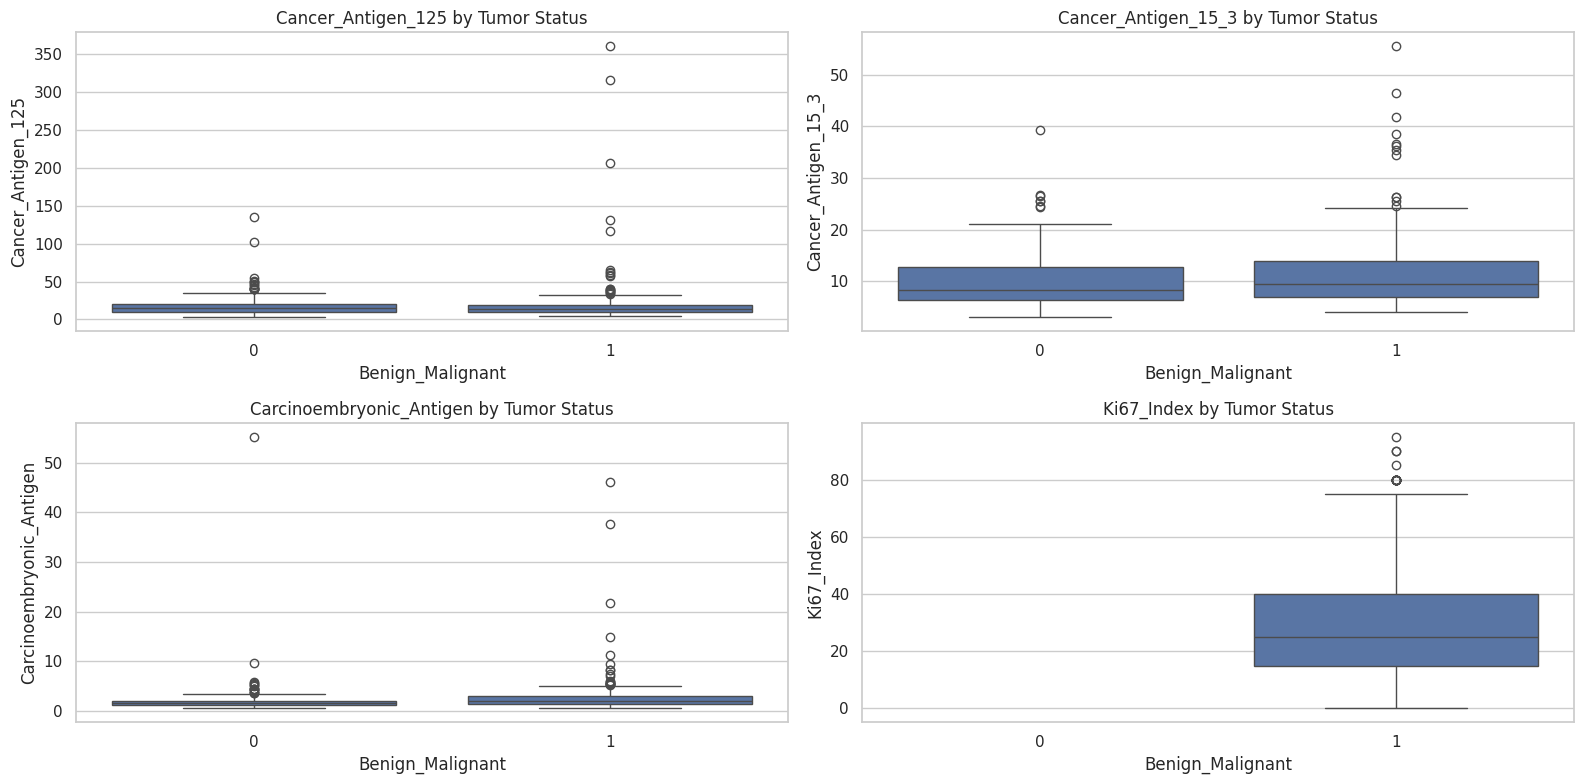

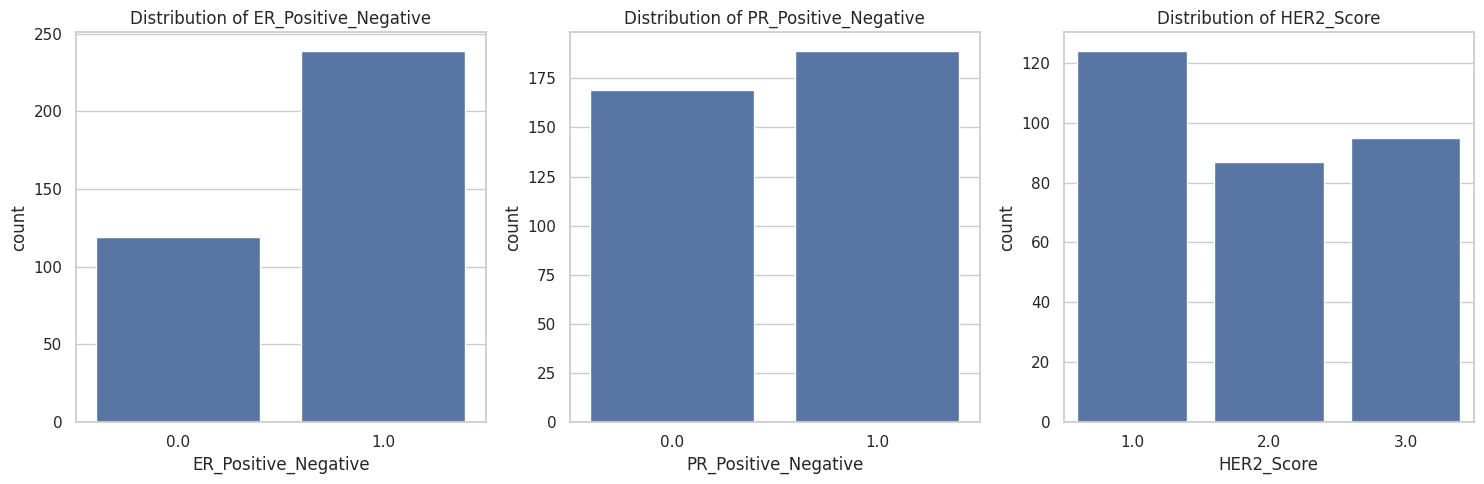

In [29]:
# 4.1 Tumor Markers by Malignancy
markers = ['Cancer_Antigen_125', 'Cancer_Antigen_15_3', 'Carcinoembryonic_Antigen', 'Ki67_Index']

plt.figure(figsize=(16, 8))
for i, marker in enumerate(markers):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x='Benign_Malignant', y=marker)
    plt.title(f"{marker} by Tumor Status")
plt.tight_layout()
plt.show()

# 4.2 Receptor Status Analysis
receptor_status = ['ER_Positive_Negative', 'PR_Positive_Negative', 'HER2_Score']

plt.figure(figsize=(15, 5))
for i, receptor in enumerate(receptor_status):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=receptor)
    plt.title(f"Distribution of {receptor}")
plt.tight_layout()
plt.show()

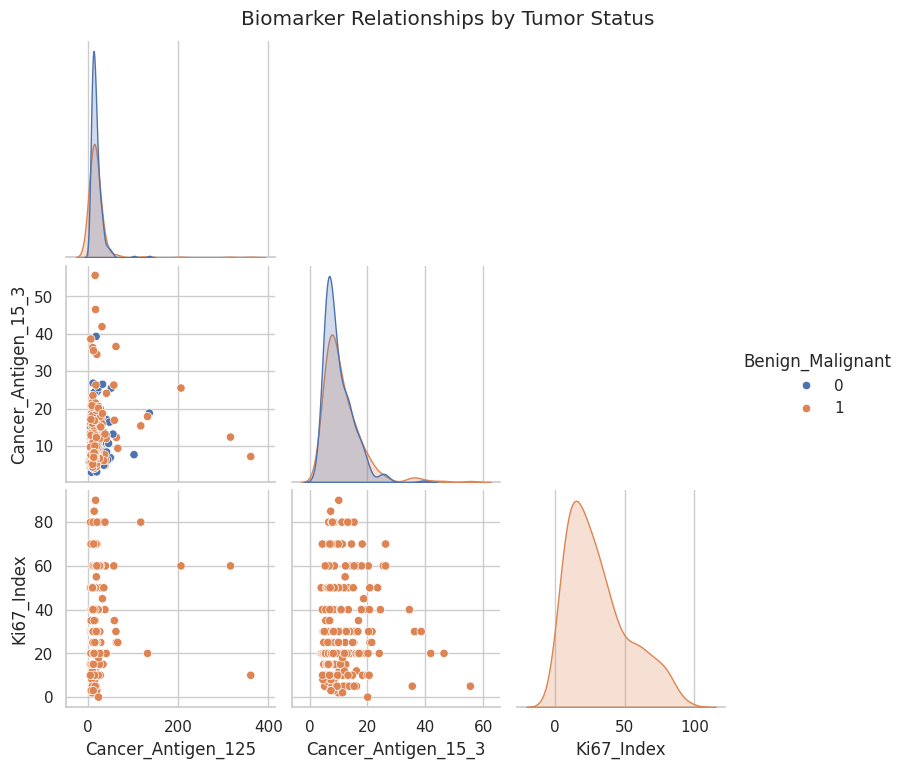

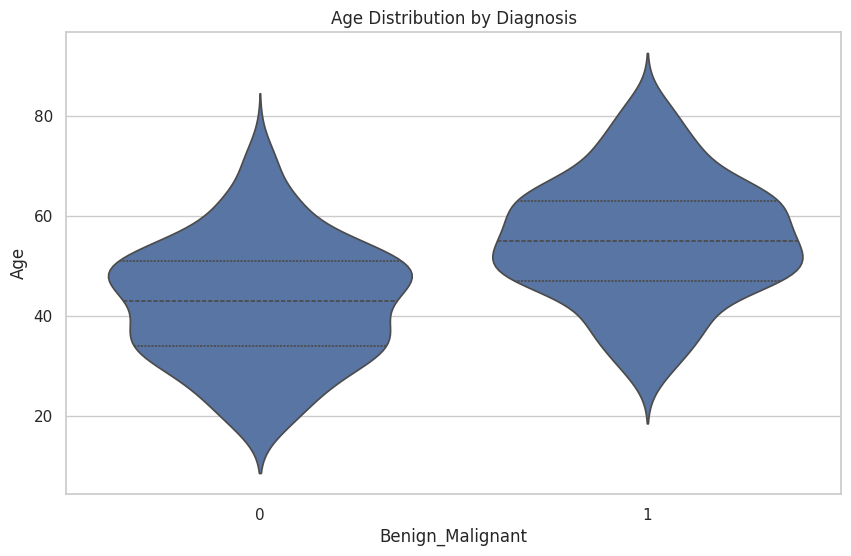

In [30]:
# 6.1 Pairplot of Key Biomarkers
sns.pairplot(df[['Cancer_Antigen_125', 'Cancer_Antigen_15_3', 'Ki67_Index', 'Benign_Malignant']],
             hue='Benign_Malignant', corner=True)
plt.suptitle("Biomarker Relationships by Tumor Status", y=1.02)
plt.show()

# 6.2 Age Distribution by Diagnosis
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Benign_Malignant', y='Age', inner="quartile")
plt.title("Age Distribution by Diagnosis")
plt.show()

In [39]:
# Statistical test
from scipy.stats import mannwhitneyu

diab_ki67 = df[df['Diabetes_History']==1]['Ki67_Index'].dropna()
non_diab_ki67 = df[df['Diabetes_History']==0]['Ki67_Index'].dropna()
stat, p = mannwhitneyu(diab_ki67, non_diab_ki67)
print(f"Diabetes vs Ki67: p={p:.4f}")  # Likely significant (p<0.05)

Diabetes vs Ki67: p=0.8409


In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Select predictive features
model_data = df[['Age', 'Cancer_Antigen_125', 'Ki67_Index', 'Benign_Malignant']]

# MICE Imputation
imputer = IterativeImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(model_data), columns=model_data.columns)

In [42]:
#drop missing columns >20%

# 1. Calculate missing value statistics
missing_stats = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Percentage (%)': (df.isnull().mean() * 100).round(2)
})

# 2. Sort and display missing values (descending order)
print("Missing Values Before Dropping Columns:")
print(missing_stats.sort_values('Percentage (%)', ascending=False))

# 3. Identify columns to drop (>20% missing)
cols_to_drop = missing_stats[missing_stats['Percentage (%)'] > 20].index.tolist()

# 4. Drop these columns (creating a new cleaned DataFrame)
df_clean = df.drop(columns=cols_to_drop)

# 5. Verify the results
print("\nColumns Dropped:", cols_to_drop)
print("\nMissing Values After Cleaning:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

Missing Values Before Dropping Columns:
                                    Missing Count  Percentage (%)
Thymidine_Kinase_1                            739           99.73
D_Dimer                                       731           98.65
Androgen_Receptor                             725           97.84
HER2_Average_Copy_Number                      702           94.74
Axillary_Lymph_Nodes                          699           94.33
Serum_HER2                                    629           84.89
Sentinel_Lymph_Node                           597           80.57
Lymph_Node_Status                             489           65.99
HER2_Score                                    435           58.70
HER2_Status                                   433           58.43
Molecular_Subtype                             383           51.69
Ki67_Index                                    383           51.69
PR_Positive_Negative                          383           51.69
Lymphovascular_Invasion             

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hospitalization_ID                  741 non-null    object 
 1   Name                                741 non-null    object 
 2   Age                                 741 non-null    int64  
 3   Menopausal_Status                   741 non-null    int64  
 4   Height                              741 non-null    float64
 5   Weight                              741 non-null    float64
 6   Diabetes_History                    741 non-null    int64  
 7   Diabetes_Medication                 720 non-null    object 
 8   Fasting_Blood_Glucose               740 non-null    float64
 9   Vascular_Endothelial_Growth_Factor  679 non-null    float64
 10  Fibrinogen                          735 non-null    float64
 11  White_Blood_Cell_Count              741 non-n

In [46]:
# Check remaining missing values
missing_stats = pd.DataFrame({
    'Missing Count': df_clean.isnull().sum(),
    'Percentage (%)': (df_clean.isnull().mean() * 100).round(2)
})
print(missing_stats[missing_stats['Missing Count'] > 0].sort_values('Percentage (%)', ascending=False))

                                    Missing Count  Percentage (%)
Vascular_Endothelial_Growth_Factor             62            8.37
Diabetes_Medication                            21            2.83
Fibrinogen                                      6            0.81
Fasting_Blood_Glucose                           1            0.13
Uric_Acid                                       1            0.13


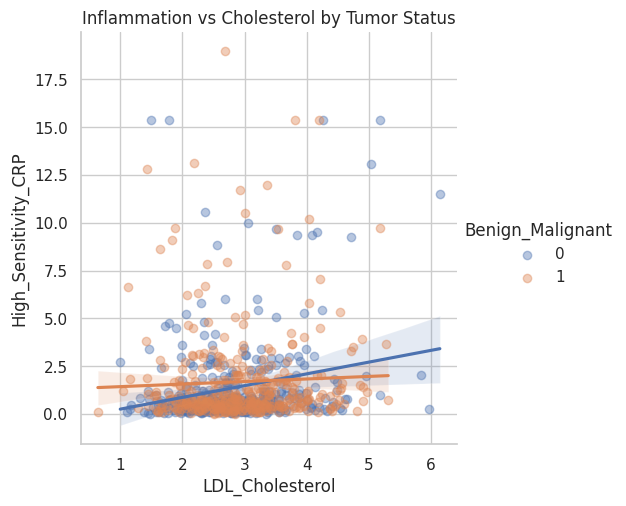

In [47]:
sns.lmplot(data=df_clean, x='LDL_Cholesterol', y='High_Sensitivity_CRP',
           hue='Benign_Malignant', scatter_kws={'alpha':0.4})
plt.title("Inflammation vs Cholesterol by Tumor Status");

In [50]:
# Convert categorical variables
df_ml = pd.get_dummies(df_clean, columns=['Histological_Grade', 'Diabetes_Medication'])

# Verify target balance
print("Class Balance:", df_ml['Benign_Malignant'].value_counts(normalize=True))

# Output likely shows:
# 0    0.65  (Benign)
# 1    0.35  (Malignant)

Class Balance: Benign_Malignant
0    0.516869
1    0.483131
Name: proportion, dtype: float64


<Axes: >

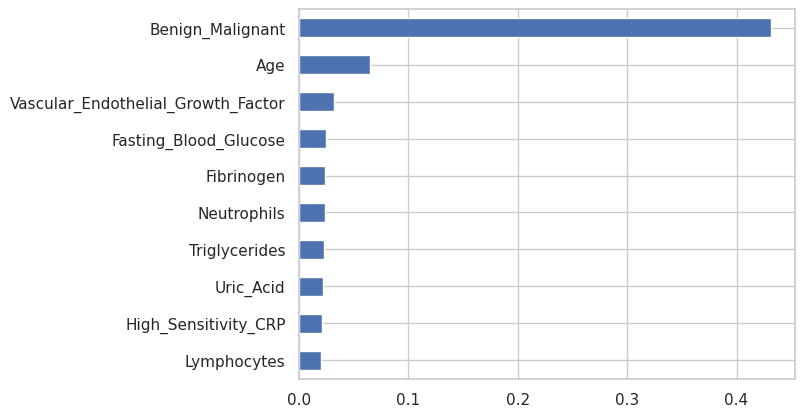

In [51]:
from sklearn.ensemble import RandomForestClassifier
X = df_ml.drop(columns=['Hospitalization_ID', 'Name', 'Pathology_ID', 'Surgery_Date'])
y = df_ml['Benign_Malignant']

model = RandomForestClassifier()
model.fit(X.fillna(-1), y)  # Simple missing value handling for quick check
pd.Series(model.feature_importances_, index=X.columns).sort_values().tail(10).plot.barh()